# Fare of Airline 

==> firstly we predict the what depending upon the other feature in our dataset

# step:1 importing libraries

==> here we import some basic libraries which is required for this project.and all the modules that are highly helpfull for us to all manipulation task,poor data and lot of analysis

In [1]:
import pandas as pd   # which is used for in case data manipulation for data analysis, to extract data from csv into dataframe
import numpy as np   # its for numarical purpose 
import seaborn as sns   # its for visualization purpose
import matplotlib.pyplot as plt  # second visualization purpose

In [2]:
# get directory
import os
os.chdir(r'C:\Users\Lenovo\Data-science-project\Fare of airline')

In [3]:
# now read the data which is in excel format
data = pd.read_excel('Data_Train.xlsx')

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# basically we have to predict what exactly can be the price of depending upon all the independent 

In [6]:
# now lets see how many missing value available in our data? so for that we call isna() with sum()

data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# check our data shape
data.shape

(10683, 11)

In [8]:
# so drop whatever missing value i have in my data.for that call drop() fun & pass parameter inplace=True

data.dropna(inplace=True)

In [9]:
# we can check again missing value
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
# we have to perform data cleaning on our data to make data ready for the analysis as ell as modelling purpose. 

In [11]:
# lets check to what exactly is a data type of each & evry variable
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
# now if it is datetime format si it means we convert Date_of_Journey,Dep_Time,Arrival_Time
# beacuse this 3 variable are basically of datetime format.

# def function that convert this 3 var to datetime format

def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [13]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
# now calling this 3 colm

for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [15]:
# now again call datatype function

data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
# so now in our dataset have date_of_journey colm.
# whenevr u pass this colm in ur ml model and u will say predict on the basis of whatever entries for ml model.
# ml model isnot able to understand whatevr entry will be awarded for.
# in such case,we have to split this date and we tell ml model,this date,month and year thats only understand ml model.
# what exactly is date for journey,month and year for journey. what to do now

In [17]:
# so for that we exixt the date_of_journey colm and access ur day and month

data['journey_day']=data['Date_of_Journey'].dt.day
data['journey_month']=data['Date_of_Journey'].dt.month

In [18]:
# lets see this two new colm in our data
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-15 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-03-15 05:50:00,2022-03-15 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-03-15 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-03-15 18:05:00,2022-03-15 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-03-15 16:50:00,2022-03-15 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [19]:
# now we drop this data_journey colm
data.drop('Date_of_Journey',axis=1, inplace=True) ## axis=1 bcz i have to drop colm in vertical way 

In [20]:
# check data 
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-15 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-03-15 05:50:00,2022-03-15 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-03-15 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-03-15 18:05:00,2022-03-15 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-03-15 16:50:00,2022-03-15 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [21]:
# in our data have arrival and departure feture and if we will pass this to ml model.
# but model is not able to understand this feature bcz it is objective type
# ml alwayas understand the data in term of numbers bcz ml exactly its all about mathematics.

In [22]:
# so for that we exixt this feature and access hour and min
# we take def fun and pass arrival and departutre time it will return exactly hour 
# df of colm  

def extract_hour(df, col):
    df[col+'_hour']= df[col].dt.hour
    

def extract_min(df, col):
    df[col+'_minute']= df[col].dt.minute
    
    
    
# and drop this fetuare

def drop_column(df, col):
    df.drop(col,axis=1, inplace=True)

In [23]:
# now extract fun for departure time

extract_hour(data,'Dep_Time')
extract_min(data,'Dep_Time')
drop_column(data,'Dep_Time')


In [24]:
# now extract fun for arrival time

extract_hour(data,'Arrival_Time')
extract_min(data,'Arrival_Time')
drop_column(data,'Arrival_Time')

In [25]:
# check data again two colm create
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [26]:
# now duration feature in figure out we have duration as in format as an hour and minute.
# so we have to pre processing  this duration feature bcz we have to tell ml model.
# so our ml model tell 2 is hour annd 50 is minute bcz ml only work with number.
# we have to split this duration but in some index entries only hours

In [27]:
duration = list(data['Duration'])

In [28]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
            print(duration[i])
        else:
            duration[i]='0h ' + duration[i]
            print(duration[i])# inside this duration we have all my updates entries

19h 0m
23h 0m
22h 0m
12h 0m
3h 0m
5h 0m
10h 0m
18h 0m
3h 0m
24h 0m
15h 0m
16h 0m
8h 0m
14h 0m
8h 0m
20h 0m
13h 0m
16h 0m
10h 0m
12h 0m
3h 0m
11h 0m
15h 0m
9h 0m
8h 0m
3h 0m
3h 0m
27h 0m
8h 0m
3h 0m
9h 0m
3h 0m
11h 0m
3h 0m
3h 0m
5h 0m
27h 0m
26h 0m
10h 0m
11h 0m
9h 0m
4h 0m
5h 0m
3h 0m
3h 0m
16h 0m
7h 0m
9h 0m
9h 0m
24h 0m
5h 0m
14h 0m
3h 0m
11h 0m
9h 0m
13h 0m
5h 0m
3h 0m
3h 0m
30h 0m
18h 0m
8h 0m
12h 0m
3h 0m
5h 0m
14h 0m
3h 0m
4h 0m
11h 0m
8h 0m
5h 0m
21h 0m
27h 0m
20h 0m
3h 0m
3h 0m
12h 0m
11h 0m
24h 0m
3h 0m
9h 0m
11h 0m
5h 0m
27h 0m
20h 0m
8h 0m
26h 0m
3h 0m
10h 0m
28h 0m
3h 0m
10h 0m
7h 0m
8h 0m
3h 0m
8h 0m
3h 0m
26h 0m
11h 0m
3h 0m
20h 0m
47h 0m
3h 0m
10h 0m
15h 0m
13h 0m
14h 0m
6h 0m
24h 0m
11h 0m
10h 0m
5h 0m
16h 0m
15h 0m
10h 0m
3h 0m
5h 0m
14h 0m
11h 0m
11h 0m
3h 0m
22h 0m
16h 0m
12h 0m
3h 0m
26h 0m
5h 0m
10h 0m
13h 0m
8h 0m
3h 0m
26h 0m
10h 0m
12h 0m
9h 0m
10h 0m
8h 0m
3h 0m
11h 0m
3h 0m
22h 0m
8h 0m
27h 0m
3h 0m
3h 0m
3h 0m
19h 0m
9h 0m
15h 0m
3h 0m
10h 0m
6h 0m
5h 0m
3h 

In [29]:
# now we have to update this duration 
# and im going to see this data what i would feature.

data['Duration']=duration

In [30]:
# check data 
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


# step:2 data pre-processing

In [31]:
# now we can fudge, what can with our hour and what can our minute for this particular duration.
# so we have to fetch this particular data and insert as a separate feature in our dataframe.

In [32]:
# we take duration time and call split() funt 
'2h 50m'.split(' ')

['2h', '50m']

In [33]:
# so can access this hour and passing index of ur list
'2h 50m'.split(' ')[0]

'2h'

In [34]:
# i have access from 0 to -1
'2h 50m'.split(' ')[0][0: -1]

'2'

In [35]:
# similarly if u want minute  pass 1
'2h 50m'.split(' ')[1][0: -1]

'50'

In [36]:
# we take define funt it will exactly an hour on that perticular duration.

def hour(x):
    return x.split(' ')[0][0: -1]   #  for hour pass 0


def minute(x):
    return x.split(' ')[1][0: -1]  #  for minute pass 1

In [37]:
# now apply this function on our duration colm

data['duration_hours'] = data['Duration'].apply(hour)  # apply for hour


In [38]:
data['duration_mins'] = data['Duration'].apply(minute) # apply for minute

In [39]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [40]:
# now we have to drop this duration feature
drop_column(data,'Duration')

In [41]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [42]:
# check datatype
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
duration_hours         object
duration_mins          object
dtype: object

In [43]:
# above datatype see duration hour and minutes is object type but its has numurical format.
# its means that u have to convert that datatype of ths hour and min. 

In [44]:
# acsses my duration hour and going convert into int formt
data['duration_hours']=data['duration_hours'].astype(int)
data['duration_mins']=data['duration_mins'].astype(int)

In [45]:
# now check again datatype
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
duration_hours          int32
duration_mins           int32
dtype: object

In [46]:
# lets now from this training data,which is exactly my dataframe and u have to extract them for
# what r my categorical data,what r my numerical data,what r my continues data?

In [47]:
# now iam going to first trade on this dataframe, its means trade on each and evry colm in one frame 
# and whoseever has a data type object those whos i going to consider that colm as a categorical data.

In [48]:
# create col for categorical

cat_col = [col for col in data.columns if data[col].dtype=='O'] 
    # here i hv to put condition if train data colm it goes to object 
    # if this condition is satisfy then only im going to consider that col in my list
cat_col
    

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [49]:
# now we have to fetch my continues feature in case used  
cont_col = [col for col in data.columns if data[col].dtype!='O'] 
cont_col
    

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'duration_hours',
 'duration_mins']

In [50]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


# handling categorical data & perform feature encoding on our data

In [51]:
# categorical data is basically two type:1) nominal data 2) ordinary data 
# nominal data?::its basically those data that are not in any order,like name of countries,name of countries doesnot hv any hierarchy
# ordinary data?:: its basically those data that has some kind of heirarchy like say good,better,best  

In [52]:
# whenever u hv ur nominal data in such case u hv to perform u one part encoding.
# whenever u hv ur ordinal data in such case u hv to use ur label Encoding 

In [53]:
# next we will basicallly deal with categorical data,encode this data bcz
# these r exactly my categorical data and ml
# ml is my int data its mean u hv to convrt ths categorical data into some int format

In [54]:
# its a new dataframe which is exactly categorical 
categorical = data[cat_col]

In [55]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [56]:
# now above categorical data i hv first deal with airline feature
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

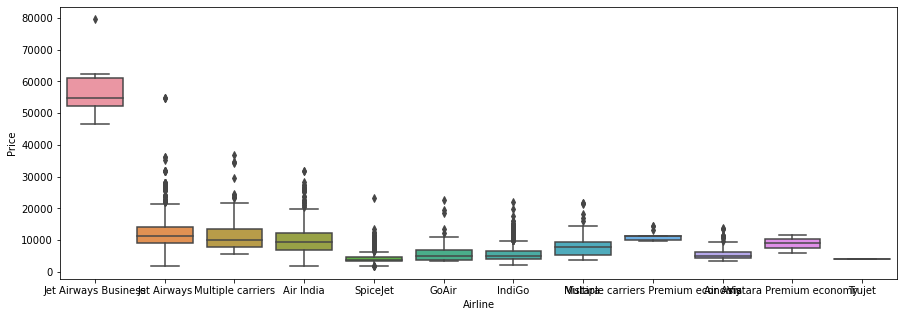

In [57]:
# lets perform analysis between this airline and price feature.
# for that u hv to found what exactly is distrubution of each airline with resp to price colm

# in case we used box plot also used distrubution plot

# use seaborn 
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price', data=data.sort_values('Price',ascending=False))

In [202]:
#lest see total stop feature
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

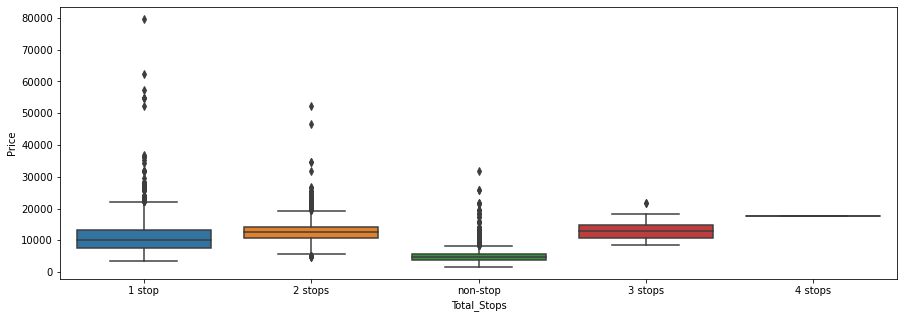

In [203]:
# this analysis perform with resp to ur total stop feature with price
# use boxplot 

plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops',y='Price', data=data.sort_values('Price',ascending=False))

In [204]:
# for that we used one hot encoding its means convert dummie variable

Airline = pd.get_dummies(categorical['Airline'],drop_first=True)

In [205]:
# call airline
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [206]:
# now we hv to do dummy on source columns

# firstly i acsses source column
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

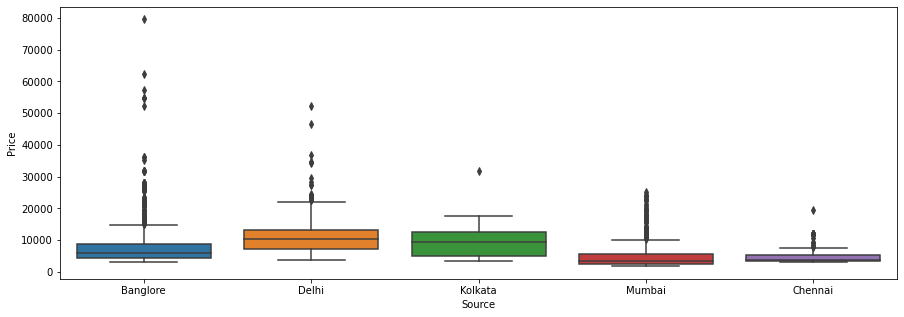

In [207]:
# now i hv to extract this distrubution of this source with resp to price

plt.figure(figsize=(15,5))
sns.boxplot(x='Source',y='Price', data=data.sort_values('Price',ascending=False))

In [208]:
# now this  source colm convert into dummy variable
Source = pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [209]:
# now we hv to do dummy on destination column as well

# firstly i acsses source column
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

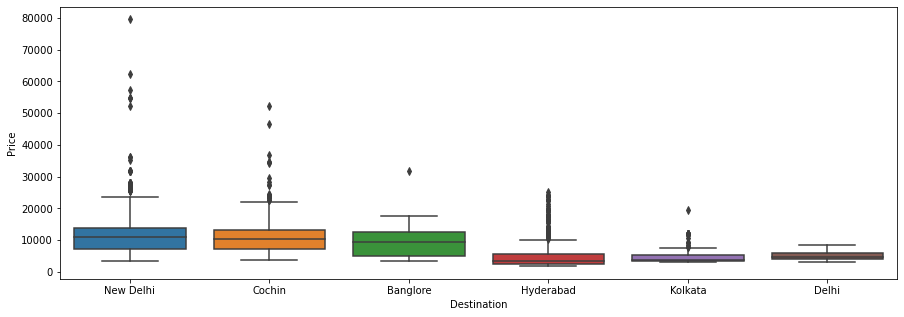

In [210]:
# now i hv to extract this distrubution of this Destination with resp to price

plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price', data=data.sort_values('Price',ascending=False))

In [211]:
# so u hv to do dummy this Destination feature
# now this Destination colm convert into dummy variable
Destination = pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [212]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [213]:
# now we deal with route colm
# u see route colm,this is exactly separator,so if u wll separate this data on basis of separator 

In [214]:
# now we hv to do dummy on Route column as well

# firstly i acsses Route column
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [215]:
# see above there r diff diff route so i hv to split this on basis of apparatus - .
# then execute it will return list 


categorical['Route'].str.split('→')

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [216]:
# now i hv to access this first banglore [BLR],so u r going to start from zero then u will get route one

categorical['Route'].str.split('→').str[0]

0        BLR 
1        CCU 
2        DEL 
3        CCU 
4        BLR 
         ... 
10678    CCU 
10679    CCU 
10680    BLR 
10681    BLR 
10682    DEL 
Name: Route, Length: 10682, dtype: object

In [217]:
# now store this in categorical[route_1,route_2,route_3,route_4,route_5,]

categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [218]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [219]:
# above data in route colm has make no sense so delete this
drop_column(categorical,'Route')

In [220]:
# now check whether i hv any null value or not

categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [221]:
# lets see above this some feature route3,4,5 has missing value 
# whenever hav any missing val just replace it with none

for i in ['Route_3','Route_4','Route_5']:
    categorical[i].fillna('None',inplace=True)


In [222]:
# again check null value
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [223]:
# now i hv to print each & evry feature has how mny categories

for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [224]:
# for that import first class

from sklearn.preprocessing import LabelEncoder

In [225]:
# noe simply initialize this level encoder so i hv to encode my all col

encoder = LabelEncoder()

In [226]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

While it's clear that you don't care about writes making it back to the original frame (since you are overwriting the reference to it), unfortunately this pattern cannot be differentiated from the first chained assignment example. Hence the (false positive) warning. The potential for false positives is addressed in the docs on indexing, if you'd like to read further. You can safely disable this new warning with the following assignment.

In [227]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [228]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i])

In [229]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [230]:
# now we deal with Additional_Info 
# bur we will know this over here in most of the rules,we hv no new information provided in Additional_Info and  so i drop this columns

drop_column(categorical,'Additional_Info')

In [231]:
# so now we deal with Total_Stops 
# i hv access categorical Total_Stops
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [232]:
# now we convert this into int format
# for that we used one hot encoder

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [233]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [234]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [235]:
# now we want to do simply concantate thhis categorical dataframe and all previous dataframe we hv defined 

data = pd.concat([categorical,Airline,Source,Destination, data[cont_col]],axis=1)

In [236]:
data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,...,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [237]:
# above see notce here r some of colm u cant see in here

In [238]:
# now we remove some colm
drop_column(data,'Airline')
drop_column(data,'Source')
drop_column(data,'Destination')

In [239]:
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [240]:
# so here 35 colm in case u hv to extend its limits
# for that we use pandas

pd.set_option('display.max_columns',35)
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


# outlier detection & outlier imutation if this available in data

In [241]:
# create def fun

def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


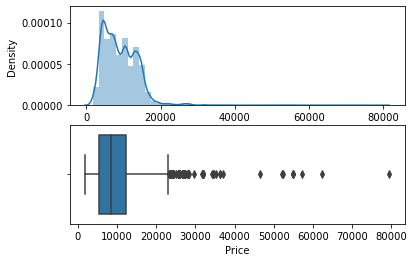

In [242]:
plot(data,'Price')

In [243]:
# above have distrubution and box plot 
# u wil see it here in this distrubution plot u hv some outlier bcz it is positively skewed distrubbution.
# similarly see in boxplot,u will see what our datapoint this r our outlier
# but whatever data point in boxplot? datapoint is greter than 40000,that is definitely outlier.
# so whatever data point i hv greater than 40000.im just going to replace it with medium bcz whenever u hv outlier medium  play over.
# so for that im going to handy fun of numpy. 

In [244]:
data['Price']=np.where(data['Price']>40000,data['Price'].median(),data['Price'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


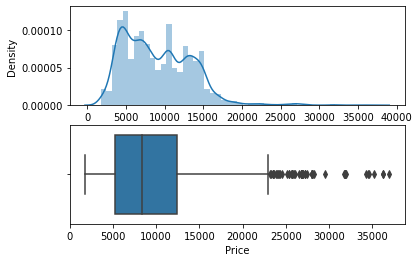

In [245]:
# check again boxplot
plot(data,'Price')

# separate out independent feature & dependent feature

In [246]:
# so now im going to separate my data
# so in X var, im going to contain my all indep var
# in Y var, im going to contain my all deped var

In [247]:
# i hv to drop price bcz price isnt deped feature,bcz this feature that we hv to study
x = data.drop('Price',axis=1)
x.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,duration_hours,duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [248]:
x.shape

(10682, 34)

In [249]:
# in y var im going to access my price
y=data['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [250]:
# this is y var exactly the index with some price entries.

# after separate indep and depend var apply Feature selection on data

In [251]:
from sklearn.feature_selection import mutual_info_classif

In [252]:
# im going to initialize  mutual_info_classif
mutual_info_classif(x,y)

array([2.17607072e+00, 2.05540987e+00, 2.75081375e+00, 2.23811654e+00,
       1.46929490e+00, 7.03489555e-01, 7.71144046e-01, 9.08798838e-02,
       6.70526753e-01, 9.41603225e-01, 1.00456628e-03, 5.67910571e-01,
       7.19267350e-03, 3.33192089e-01, 0.00000000e+00, 2.23100657e-01,
       0.00000000e+00, 1.79064382e-01, 1.56633047e+00, 8.83510087e-01,
       2.96475907e-01, 1.56314467e+00, 4.15948887e-01, 2.95091656e-01,
       1.77990703e-01, 3.62998136e-01, 1.07761960e+00, 8.66809780e-01,
       1.41835731e+00, 1.21308264e+00, 1.82268054e+00, 1.52971764e+00,
       1.79502782e+00, 1.05615837e+00])

In [253]:
# above code get some kind of importance with resp to target variable.

In [254]:
# now i hv to create data frame and in dataframe, i hv met all col with resp to its priority,

imp = pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
imp

,0
Total_Stops,2.163856
Route_1,2.062467
Route_2,2.760364
Route_3,2.322160
Route_4,1.507465
Route_5,0.752136
Air India,0.778235
GoAir,0.091824
IndiGo,0.670847
Jet Airways,0.897955


In [255]:
# i hv to rename this colm name
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.760364
Route_3,2.322160
Total_Stops,2.163856
Route_1,2.062467
Arrival_Time_hour,1.838934
duration_hours,1.779851
Cochin,1.542343
Delhi,1.539808
Arrival_Time_minute,1.524759
Route_4,1.507465


# Apply machine learning algoritham on data and automate  ur prediction

# randomforest classification

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [258]:
from sklearn import metrics

In [259]:
import pickle

In [260]:
# def function and pass ml model and it will return as prediction w r to model i pass over there
def predict(ml_model):
    ml_model.fit(x_train,y_train)
    print('training score: {}'.format(ml_model.score(x_train,y_train)))
    y_prediction=ml_model.predict(x_test)
    print('predictions are:\n {}'.format(y_prediction))
    print('\n')
    
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score is: {}'.format(r2_score))
    
    print('MSE :',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE :',metrics.mean_squared_error(y_test,y_prediction))
    print('MSE :',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)

In [261]:
# importing random forest regression part
from sklearn.ensemble import RandomForestRegressor

training score: 0.9535405563221088
predictions are:
 [15267.845       3682.262       3568.351      ... 12415.72
  3490.33       12158.56833333]


r2 score is: 0.8144252992968901
MSE : 1127.4798746000008
MSE : 3523054.019880585
MSE : 1876.9800265001716


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


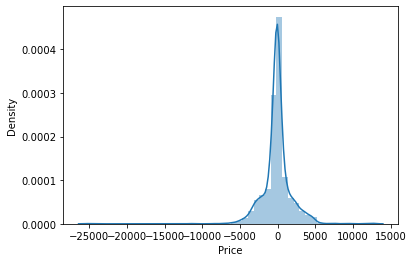

In [262]:
predict(RandomForestRegressor())

In [263]:
def predict(ml_model,dump):
    ml_model.fit(x_train,y_train)
    print('training score: {}'.format(ml_model.score(x_train,y_train)))
    y_prediction=ml_model.predict(x_test)
    print('predictions are:\n {}'.format(y_prediction))
    print('\n')
    
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score is: {}'.format(r2_score))
    
    print('MSE :',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE :',metrics.mean_squared_error(y_test,y_prediction))
    print('MSE :',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        file=open(r'C:\Users\Lenovo\Data-science-project\model.pkl','wb')
        pickle.dump(ml_model,file)

training score: 0.9537398920925837
predictions are:
 [15246.63833333  3683.135       3567.197      ... 12397.22
  3455.51       12213.73      ]


r2 score is: 0.8146890635722444
MSE : 1129.9103662586958
MSE : 3518046.571197834
MSE : 1875.6456411587542


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


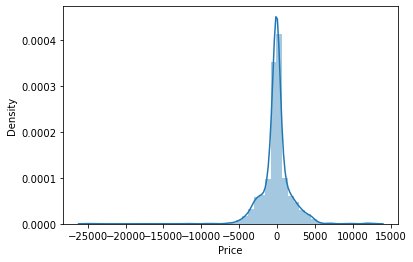

In [264]:
# check our dump model in RandomForestRegressor
predict(RandomForestRegressor(),1)

# now play with multiple algorithm

#### firsly dump our model 
#### then play with multiple algorithm

In [265]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

training score: 0.61871952449607
predictions are:
 [10524.93655356  3472.58395981  3540.94742953 ... 11740.15049461
  2159.725326   11520.2977481 ]


r2 score is: 0.6033659944505987
MSE : 1966.3676153868864
MSE : 7529922.033433405
MSE : 2744.070340467497


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


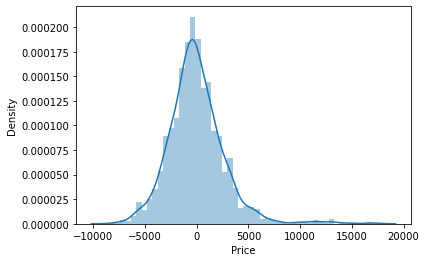

In [266]:
# i pass 0 bcz i dont hv dump model value
predict(LinearRegression(),0)

training score: 0.9666317015349017
predictions are:
 [16079.  3573.  3597. ... 10991.  4392. 13044.]


r2 score is: 0.72910654004395
MSE : 1281.0921853065045
MSE : 5142793.114802682
MSE : 2267.7727211523384


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


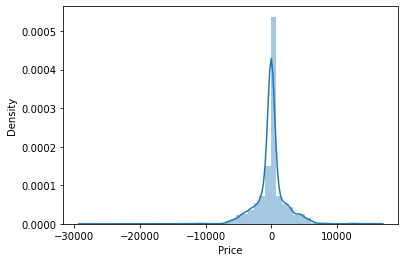

In [267]:
predict(DecisionTreeRegressor(),0)

training score: 0.7789927752940548
predictions are:
 [11952.6  3860.2  3553.8 ... 11830.2  3081.6 11880.4]


r2 score is: 0.652195078790649
MSE : 1708.5839026672904
MSE : 6602923.357323349
MSE : 2569.6154103918643


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


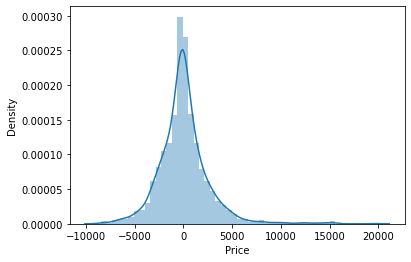

In [268]:
predict(KNeighborsRegressor(),0)

# Cross-validation

##### this approch is used for hypertunne for our model

In [277]:
# first import sklearn

from sklearn.model_selection import RandomizedSearchCV

In [280]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [281]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [282]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [283]:
### initialise your estimator
reg_rf=RandomForestRegressor()

In [284]:
# now initialize it for using diff diff parameter
# in randomizedsearchcv in 1st parameter;estimotor pass objrct of RF and 2nd parameter:param_distrubbution.
# verbose parameter is basically show ur watever activity is happening acrross ur cell once u will.
# n_job parameter 
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [285]:
# NOW simply fit our data
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [ ]:
# above these all parameter written by cross-validation written by cross-validation

In [286]:
# so now i checch my best parameters
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

In [287]:
# now i hve to do prediction on test data
prediction=rf_random.predict(x_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

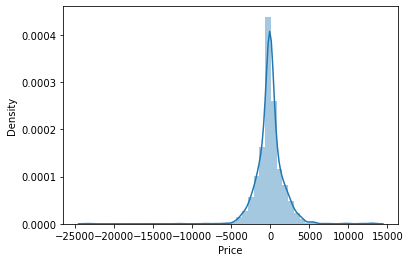

In [288]:
# check exactly distrubution between ur actual data with prediction data

sns.distplot(y_test-prediction)

In [289]:
metrics.r2_score(y_test,prediction)

0.8429375493648156

In [ ]:
# this s in case randomforest u hv approximate 84 % accuraacy
# before when u use RF u can observe u hv some tools to 80% accuracy that are power of ur model hypertuning 

In [290]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1103.1433766692912
MSE 2981761.5008192193
RMSE 1726.7777798023749


In [ ]:
# i hv to dump this model, this best model that i hv created over here below

In [291]:
import pickle

In [292]:
# so for that open some file,where you want to store the data
file=open(r'C:\Users\Lenovo\Data-science-project\rf_random.pkl','wb')

In [293]:
# dump information to that file
pickle.dump(rf_random,file)

In [ ]:
# we hv to do prediction using that model,using that model that i hv created over here

In [294]:
model=open(r'C:\Users\Lenovo\Data-science-project\rf_random.pkl','rb')
forest=pickle.load(model)

In [295]:
forest

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [ ]:
# now i hv to do prediciton using this model

In [296]:
y_prediction=forest.predict(x_test)

In [297]:
y_prediction

array([14290.22409039,  3801.41421754,  3563.51275179, ...,
       11899.29404381,  3117.06193855, 11206.78025774])

In [ ]:
# i hv to check accuracy 

In [298]:
metrics.r2_score(y_test,y_prediction)

0.8429375493648156